<a href="https://colab.research.google.com/github/levi3001/cs470_term_project_toxic_classification/blob/main/toxic_classification_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

import os
import random
import re

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import re
from tqdm.auto import tqdm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip  drive/MyDrive/jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  drive/MyDrive/jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [4]:
train_data=pd.read_csv('data/train.csv.zip')
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
test_data=pd.read_csv('data/test.csv.zip')
test_data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [6]:
test_label=pd.read_csv('data/test_labels.csv.zip')
test_label

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [7]:
import string
def remove_punc(text):
  return text.translate(str.maketrans('', '', string.punctuation))

In [8]:
#https://www.kaggle.com/gtskyler/toxic-comments-bert
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [9]:
#train_data['comment_text']=train_data['comment_text'].map(lambda text: clean_text(text))
#test_data['comment_text']=test_data['comment_text'].map(lambda text: clean_text(text))

In [10]:
train_data['comment_texxxt'] = train_data['comment_text'].map(lambda text: clean_text(text)).map(lambda text: remove_punc(text))
test_data['comment_texxxt'] = test_data['comment_text'].map(lambda text: clean_text(text)).map(lambda text: remove_punc(text))



In [11]:
train_values_x = train_data['comment_texxxt'].values
train_values_y = train_data[["toxic","severe_toxic","obscene","threat","insult","identity_hate"]].values
test_x= test_data['comment_texxxt'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_x, val_x, train_y, val_y = train_test_split(train_values_x, train_values_y, test_size=0.2, random_state=30)

In [14]:
train_x

array(['you had the image name right but you left a blank width parameter that apparently prevented the image from showing',
       'aksungur hi nico you have created the article aksungur please see my note in the discussion page talk have a good day',
       'samaleks if you can prove that i am from that douchebag forum called skyscrapercity or that i am a meat puppet please go ahead please be aware that i will continue to revert false propaganda and correct information on pages if you revert my corrected information that turns out to be war so you are the one starting the war',
       ...,
       'national playing fields association just thought you might like to see how with the help of the npfa the page has grown since your initial creation i am sure there is still far more to do',
       're booth swarbrick and whalen sorry i posted that request was so long ago that now i can scarcely remember what i was after once upon a time i think the larkin page made reference to these books 

In [15]:
val_x

array(['the syrian army is now advancing on aleppo with russian air cover this article is inherently unstable the article is also edited appropriately as the war progresses which just means it is unstable',
       'oppose there is zero benefit to readers particularly mobile users from ambiguous titles justin brown defensive lineman born 1982 gridiron football defensive end justin brown wide receiver born 1991 american football wide receiver and justin brown aquanaut american professional aquanaut are clearly titled per wp criteria at the moment leave well alone',
       'file skin of our teeth handbill jpg you have added a comment asking for the addition of a copyright status however i do not see any warnings attached to that image so i do not understand what is wrong with what i have already attached it is a low res version of a promotional item which comes under fair use it is also a photograph of something i own so it is also covered under fair use from that angle tell me that you t

In [16]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 8.5 MB/s 
     |████████████████████████████████| 895 kB 62.1 MB/s 
     |████████████████████████████████| 61 kB 628 kB/s 
     |████████████████████████████████| 596 kB 72.5 MB/s 
     |████████████████████████████████| 3.3 MB 57.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [17]:
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel, TFBertForSequenceClassification

In [18]:
# choose bert model

#model_name = 'distilbert-base-uncased'
model_name= 'bert-base-uncased'


#max length of sentences
max_length = 128

#load transformers config
config = BertConfig.from_pretrained(model_name)



#load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

#load BERT model
bert = TFAutoModel.from_pretrained(model_name)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [19]:
tokenizer

PreTrainedTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [20]:
#tokenize dataset

train_x = tokenizer(text=list(train_x), add_special_tokens=True, max_length=max_length,
    truncation=True, padding=True, return_tensors='tf', return_token_type_ids = True, return_attention_mask = True,
    verbose = True)
val_x= tokenizer(text=list(val_x), add_special_tokens=True, max_length=max_length,
    truncation=True, padding=True, return_tensors='tf', return_token_type_ids = True, return_attention_mask = True,
    verbose = True)
test_x = tokenizer(text=list(test_x), add_special_tokens=True, max_length=max_length,
    truncation=True, padding=True, return_tensors='tf', return_token_type_ids = True, return_attention_mask = True,
    verbose = True)

In [21]:
print(train_x)
print(val_x)
print(test_x)

{'input_ids': <tf.Tensor: shape=(127656, 128), dtype=int32, numpy=
array([[  101,  2017,  2018, ...,     0,     0,     0],
       [  101, 17712, 19729, ...,     0,     0,     0],
       [  101,  3520,  9453, ...,     0,     0,     0],
       ...,
       [  101,  2120,  2652, ...,     0,     0,     0],
       [  101,  2128,  9065, ...,     0,     0,     0],
       [  101,  2123,  2102, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(127656, 128), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(127656, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dt

In [22]:
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D

In [25]:
# build_model

def build_classifier_model():
    input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32') 
    inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
    seq_output = bert(inputs)[0]
    x=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(seq_output)
    x=tf.keras.layers.Dropout(0.2)(x)
    y=tf.keras.layers.Dense(6,name='outputs')(x)
    model= tf.keras.Model(inputs, y)
    return model

In [26]:
model = build_classifier_model()


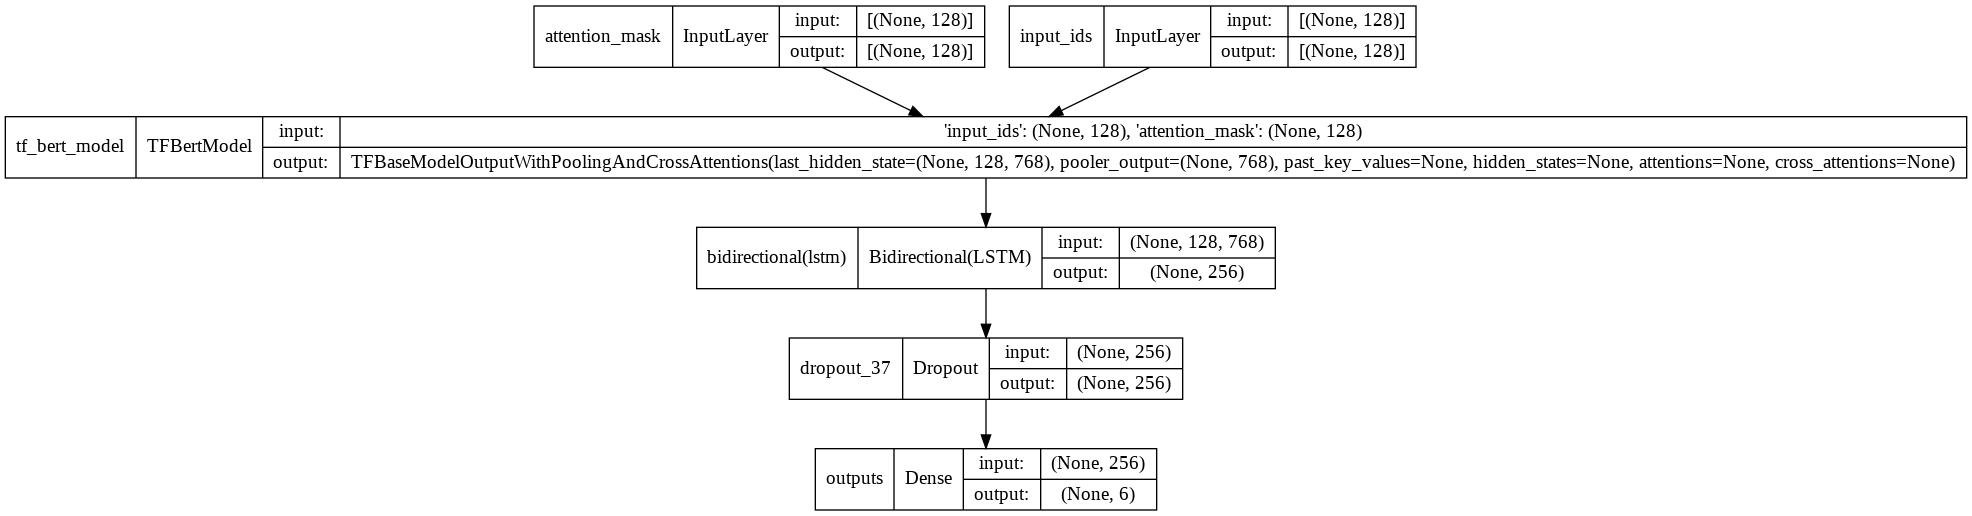

In [27]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [28]:
from tensorflow.keras.optimizers import Adam

model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer =Adam(learning_rate=1e-5, decay=1e-6), metrics = ['accuracy'])

#training
model.fit(x={'input_ids': train_x['input_ids'], 'attention_mask': train_x['attention_mask']},
    y={'outputs': train_y}, epochs = 2, 
     validation_data=({'input_ids': val_x['input_ids'], 'attention_mask': val_x['attention_mask']},
    {'outputs': val_y}),
    batch_size = 32, )

Epoch 1/2
   7/3990 [..............................] - ETA: 31:56 - loss: 0.5457 - accuracy: 0.0982

KeyboardInterrupt: ignored

In [ ]:
#make prediction

predicted = tf.math.sigmoid(model.predict({'input_ids': test_x['input_ids'], 'attention_mask': test_x['attention_mask']}, batch_size = 200))
predict = np.hstack((test_data.id[:, np.newaxis], predicted))


In [ ]:
subm = pd.DataFrame(predict, columns = ['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
subm.to_csv('subm.csv', index = False)

In [ ]:
subm

In [ ]:
predicted

In [ ]:
test_x

In [ ]:
import matplotlib.pyplot as plt
name=  [ 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
values= [sum(train_data[name[i]]>0) for i in range(len(name))]
plt.bar(name, values)
plt.show()